In [2]:
!pip install logparser3 -q

In [13]:
!python3 data_preprocessing.py -i HDFS.log -o out_hdfs --st 0.4 --depth 4 --use_typed
# python make_drain_outputs.py -i HDFS_v1/HDFS.log -o out_hdfs --use_typed

2025-09-24 20:21:32 | INFO | Start | input=/home/jupyter/HDFS.log out=/home/jupyter/out_hdfs use_typed=True force=False block_regex='(blk_[\\-]?\\d+)'
2025-09-24 20:21:32 | INFO | [skip] Using existing preprocessed file: /home/jupyter/out_hdfs/drain_tmp/preprocessed_typed.log
2025-09-24 20:21:32 | INFO | [skip] Drain already completed: preprocessed_typed.log_structured.csv
2025-09-24 20:21:32 | INFO | [info] structured csv: /home/jupyter/out_hdfs/drain_tmp/preprocessed_typed.log_structured.csv
Lecture structured.csv (chunks): 56it [01:10,  1.25s/it]
2025-09-24 20:22:42 | INFO | [write] /home/jupyter/out_hdfs/log_template.csv
2025-09-24 20:22:42 | INFO | [write] /home/jupyter/out_hdfs/event_occurrences.csv
2025-09-24 20:22:47 | INFO | [write] /home/jupyter/out_hdfs/event_traces.csv
2025-09-24 20:24:27 | INFO | [write] /home/jupyter/out_hdfs/structured.csv
2025-09-24 20:24:27 | INFO | Done ✅
2025-09-24 20:24:27 | INFO | Outputs:
- /home/jupyter/out_hdfs/log_template.csv
- /home/jupyter/o

In [1]:
import pandas as pd
p=pd.read_csv('out_hdfs/structured.csv')
p.head(10)

,LineId,Content,EventId,EventTemplate,ParameterList
0,1,<NUM> <NUM> <NUM> info <DOMAIN>$dataxceiver: r...,c0fa3a5e,<*> <*> <*> info <*>$dataxceiver: receiving bl...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', 'blk_-<HE..."
1,2,<NUM> <NUM> <NUM> info <DOMAIN>: block* <DOMAI...,4640e367,<*> <*> <*> info <*>: block* <*>: <*> <*>,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', '<DOMAIN>..."
2,3,<NUM> <NUM> <NUM> info <DOMAIN>$dataxceiver: r...,c0fa3a5e,<*> <*> <*> info <*>$dataxceiver: receiving bl...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', 'blk_-<HE..."
3,4,<NUM> <NUM> <NUM> info <DOMAIN>$dataxceiver: r...,c0fa3a5e,<*> <*> <*> info <*>$dataxceiver: receiving bl...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', 'blk_-<HE..."
4,5,<NUM> <NUM> <NUM> info <DOMAIN>$packetresponde...,2ff75874,<*> <*> <*> info <*>$packetresponder: packetre...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', '<NUM>', ..."
5,6,<NUM> <NUM> <NUM> info <DOMAIN>$packetresponde...,2ff75874,<*> <*> <*> info <*>$packetresponder: packetre...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', '<NUM>', ..."
6,7,<NUM> <NUM> <NUM> info <DOMAIN>$packetresponde...,187a47d3,<*> <*> <*> info <*>$packetresponder: received...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', 'blk_-<HE..."
7,8,<NUM> <NUM> <NUM> info <DOMAIN>$packetresponde...,187a47d3,<*> <*> <*> info <*>$packetresponder: received...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', 'blk_-<HE..."
8,9,<NUM> <NUM> <NUM> info <DOMAIN>$packetresponde...,2ff75874,<*> <*> <*> info <*>$packetresponder: packetre...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', '<NUM>', ..."
9,10,<NUM> <NUM> <NUM> info <DOMAIN>$packetresponde...,187a47d3,<*> <*> <*> info <*>$packetresponder: received...,"['<NUM>', '<NUM> <NUM>', '<DOMAIN>', 'blk_-<HE..."


In [2]:
import pandas as pd
traces=pd.read_csv('out_hdfs/event_traces.csv')
traces.head(10)

,BlockId,EventSequence
0,blk_-1608999687919862906,"['c0fa3a5e', '4640e367', 'c0fa3a5e', 'c0fa3a5e..."
1,blk_7503483334202473044,"['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e..."
2,blk_-3544583377289625738,"['c0fa3a5e', '4640e367', 'c0fa3a5e', 'c0fa3a5e..."
3,blk_-9073992586687739851,"['c0fa3a5e', '4640e367', 'c0fa3a5e', 'c0fa3a5e..."
4,blk_7854771516489510256,"['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e..."
5,blk_1717858812220360316,"['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e..."
6,blk_-2519617320378473615,"['c0fa3a5e', '4640e367', 'c0fa3a5e', 'c0fa3a5e..."
7,blk_7063315473424667801,"['c0fa3a5e', 'c0fa3a5e', 'c0fa3a5e', '4640e367..."
8,blk_8586544123689943463,"['c0fa3a5e', 'c0fa3a5e', 'c0fa3a5e', '4640e367..."
9,blk_2765344736980045501,"['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e..."


In [3]:
traces.shape

(575061, 2)

In [4]:
import pandas as pd
label=pd.read_csv('out_hdfs/anomaly_label.csv')
label.head(10)

,BlockId,Label
0,blk_-1608999687919862906,Normal
1,blk_7503483334202473044,Normal
2,blk_-3544583377289625738,Anomaly
3,blk_-9073992586687739851,Normal
4,blk_7854771516489510256,Normal
5,blk_1717858812220360316,Normal
6,blk_-2519617320378473615,Normal
7,blk_7063315473424667801,Normal
8,blk_8586544123689943463,Normal
9,blk_2765344736980045501,Normal


In [5]:
# !rm -rf reach-vb wandb


In [6]:
# --- Imports
import pandas as pd

# --- Config (tweak if your positive class uses a different string)
ANOMALY_VALUE = "Normal"     # the value in `label["Label"]` that means "positive"
DEFAULT_FOR_UNKNOWN = 0       # what to assign when a BlockId in traces isn't in label (use None to leave NaN)
ERROR_ON_UNKNOWN = False      # set True to raise if there are unknown BlockIds

# --- Preconditions (optional but helpful assertions)
assert "BlockId" in traces.columns, "traces must contain a 'BlockId' column"
assert {"BlockId", "Label"}.issubset(label.columns), "label must contain 'BlockId' and 'Label' columns"

# --- Clean up `label`: drop rows with missing BlockId, resolve duplicates deterministically
label_clean = (
    label.loc[label["BlockId"].notna(), ["BlockId", "Label"]]
    .drop_duplicates(subset=["BlockId"], keep="last")  # keep last occurrence if duplicated
    .reset_index(drop=True)
)

# --- (Optional) sanity check: show values present in label["Label"]
label_values = label_clean["Label"].dropna().unique().tolist()
print(f"[info] Unique values in label['Label']: {label_values}")

# --- Identify unknown BlockIds in traces
unknown_ids = pd.Index(traces["BlockId"]).difference(label_clean["BlockId"])
if len(unknown_ids):
    msg = f"[warn] {len(unknown_ids)} BlockId(s) in traces not found in label. Example: {unknown_ids[:3].tolist()}"
    if ERROR_ON_UNKNOWN:
        raise KeyError(msg)
    else:
        print(msg)

# --- Merge and build the binary target
data_df = traces.merge(label_clean, on="BlockId", how="left", validate="m:1")

# Optionally set a default for unknowns (those with Label = NaN after merge)
if DEFAULT_FOR_UNKNOWN is None:
    # keep NaN and only map known rows
    binary = (data_df["Label"] == ANOMALY_VALUE).astype("Int64")  # nullable integer if you want NaNs preserved
else:
    # fill unknowns as non-anomaly (0 by default)
    is_anom = data_df["Label"] == ANOMALY_VALUE
    is_anom = is_anom.fillna(False)
    binary = is_anom.astype(int)

data_df["Label"] = binary

# --- Optional: quick QA
print(f"[info] data_df shape: {data_df.shape}")
print(f"[info] Label value counts:\n{data_df['Label'].value_counts(dropna=False)}")
display(data_df.head(5))


[info] Unique values in label['Label']: ['Normal', 'Anomaly']
[info] data_df shape: (575061, 3)
[info] Label value counts:
Label
1    558223
0     16838
Name: count, dtype: int64


,BlockId,EventSequence,Label
0,blk_-1608999687919862906,"['c0fa3a5e', '4640e367', 'c0fa3a5e', 'c0fa3a5e...",1
1,blk_7503483334202473044,"['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e...",1
2,blk_-3544583377289625738,"['c0fa3a5e', '4640e367', 'c0fa3a5e', 'c0fa3a5e...",0
3,blk_-9073992586687739851,"['c0fa3a5e', '4640e367', 'c0fa3a5e', 'c0fa3a5e...",1
4,blk_7854771516489510256,"['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e...",1


In [7]:
def _split_data(x_data, y_data, train_ratio=0.5):
    pos_idx = y_data > 0
    x_pos = x_data[pos_idx]
    y_pos = y_data[pos_idx]
    x_neg = x_data[~pos_idx]
    y_neg = y_data[~pos_idx]
    train_pos = int(train_ratio * x_pos.shape[0])
    train_neg = int(train_ratio * x_neg.shape[0])
    x_train = np.hstack([x_pos[0:train_pos], x_neg[0:train_neg]])
    y_train = np.hstack([y_pos[0:train_pos], y_neg[0:train_neg]])
    x_test = np.hstack([x_pos[train_pos:], x_neg[train_neg:]])
    y_test = np.hstack([y_pos[train_pos:], y_neg[train_neg:]])

    return (x_train, y_train), (x_test, y_test)

In [9]:
# Split train and test data
import numpy as np
train_ratio = 0.8
(x_train, y_train), (x_test, y_test) = _split_data(data_df['EventSequence'].values,
    data_df['Label'].values, train_ratio)

In [10]:
num_train = x_train.shape[0]
num_test = x_test.shape[0]
num_total = num_train + num_test
num_train_pos = sum(y_train)
num_test_pos = sum(y_test)
num_pos = num_train_pos + num_test_pos

print('Total: {} instances, {} anomaly, {} normal' \
      .format(num_total, num_pos, num_total - num_pos))
print('Train: {} instances, {} anomaly, {} normal' \
      .format(num_train, num_train_pos, num_train - num_train_pos))
print('Test: {} instances, {} anomaly, {} normal\n' \
      .format(num_test, num_test_pos, num_test - num_test_pos))

#print(type(x_train))
print('====== x_train (first five lines) ======')
print(x_train[:5])

print('====== y_train (first five lines) ======')
print(y_train[:5])

Total: 575061 instances, 558223 anomaly, 16838 normal
Train: 460048 instances, 446578 anomaly, 13470 normal
Test: 115013 instances, 111645 anomaly, 3368 normal

====== x_train (first five lines) ======
["['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e', '2ff75874', '187a47d3', '2ff75874', '187a47d3', '2ff75874', '187a47d3', 'b4b5776f', 'b4b5776f', 'b4b5776f', '7adc7fed', '7adc7fed', '7adc7fed', 'ba1e40ba', 'ba1e40ba', 'ba1e40ba']"
 "['c0fa3a5e', 'c0fa3a5e', '4640e367', 'c0fa3a5e', '2ff75874', '187a47d3', '2ff75874', '187a47d3', 'b4b5776f', 'b4b5776f', '2ff75874', '187a47d3', 'b4b5776f']"
 "['4640e367', 'c0fa3a5e', 'c0fa3a5e', 'c0fa3a5e', 'b4b5776f', 'b4b5776f', 'b4b5776f', '2ff75874', '187a47d3', '2ff75874', '187a47d3', '2ff75874', '187a47d3', '7adc7fed', '7adc7fed', '7adc7fed', 'ba1e40ba', 'ba1e40ba', 'ba1e40ba']"
 "['c0fa3a5e', 'c0fa3a5e', 'c0fa3a5e', '4640e367', '2ff75874', '187a47d3', 'b4b5776f', '2ff75874', '187a47d3', '2ff75874', '187a47d3', 'b4b5776f', 'b4b5776f', '7adc7fed', '7a

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.utils import shuffle
from collections import OrderedDict
from collections import Counter

def transform_train_data(X_seq):
    X_counts = []
    for i in range(X_seq.shape[0]):
        event_counts = Counter(X_seq[i])
        X_counts.append(event_counts)
    X_df = pd.DataFrame(X_counts)
    X_df = X_df.fillna(0)
    events = X_df.columns
    X = X_df.values
    return (X, events)

transformed = transform_train_data(x_train)
x_train = transformed[0]
# The events in the training data,
# used later to ingore the events in the test data that is unseen in the training data
events = transformed[1]

print('====== Transformed train data summary ======')
print('Train data shape: {}-by-{}\n'.format(x_train.shape[0], x_train.shape[1]))
print(x_train[:5])

In [ ]:
def transform_test_data(X_seq, events):
    X_counts = []
    for i in range(X_seq.shape[0]):
        event_counts = Counter(X_seq[i])
        X_counts.append(event_counts)
    X_df = pd.DataFrame(X_counts)
    X_df = X_df.fillna(0)
    # treat the counts of the missing events as 0s
    empty_events = set(events) - set(X_df.columns)
    for event in empty_events:
        X_df[event] = [0] * len(X_df)
    X = X_df[events].values
    return X

x_test = transform_test_data(x_test, events)

print('====== Transformed test data summary ======')
print('Test data shape: {}-by-{}\n'.format(x_test.shape[0], x_test.shape[1]))
print(x_test[:5])

In [11]:
# pip install transformers torch --quiet
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import pandas as pd
import ast
from tqdm.auto import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "distilbert-base-uncased"  # or "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME).to(DEVICE)
model.eval()

def _ensure_token_list(x):
    """
    Ensure each sample is a list[str] of event tokens.
    Your printout shows items like "['c0fa3a5e', ...]" (stringified lists).
    """
    if isinstance(x, str):
        try:
            # Safe parse to list if it's a stringified Python list
            parsed = ast.literal_eval(x)
            if isinstance(parsed, (list, tuple)):
                return list(map(str, parsed))
            return [str(x)]
        except Exception:
            # Fallback: split on commas/spaces
            s = x.strip().strip('"').strip("'")
            # Try comma first, else whitespace
            parts = [p.strip(" '\"") for p in (s.split(",") if "," in s else s.split())]
            return [p for p in parts if p]
    elif isinstance(x, (list, tuple, np.ndarray, pd.Series)):
        return list(map(str, list(x)))
    else:
        return [str(x)]

def bert_embed_sequences(X_seq, batch_size=256, max_length=256, pooling="mean"):
    """
    X_seq: array-like of sequences; each sequence is list[str] (event IDs) or stringified list.
    Returns: np.ndarray [num_samples, hidden_dim]
    """
    # Prepare lists of token lists
    token_lists = [_ensure_token_list(s) for s in X_seq]

    embeddings = []
    with torch.no_grad():
        for i in tqdm(range(0, len(token_lists), batch_size), desc="BERT embedding"):
            batch_tokens = token_lists[i:i+batch_size]
            # Tokenize: treat each item as pre-split words
            enc = tokenizer(
                batch_tokens,
                is_split_into_words=True,
                truncation=True,
                padding=True,
                max_length=max_length,
                return_tensors="pt"
            )
            enc = {k: v.to(DEVICE) for k, v in enc.items()}
            outputs = model(**enc)        # last_hidden_state: [B, T, H]
            last_hidden = outputs.last_hidden_state
            mask = enc["attention_mask"].unsqueeze(-1)  # [B, T, 1]

            if pooling == "cls" and last_hidden.size(1) > 0:
                pooled = last_hidden[:, 0]  # [CLS]
            else:
                # mean pooling over valid tokens
                summed = (last_hidden * mask).sum(dim=1)               # [B, H]
                counts = mask.sum(dim=1).clamp(min=1e-9)               # [B, 1]
                pooled = summed / counts

            embeddings.append(pooled.detach().cpu().numpy())

    return np.vstack(embeddings)

# ==== Build embeddings ====
# Replace your previous transform_* calls with:
x_train = bert_embed_sequences(x_train, batch_size=256, max_length=256, pooling="mean")
x_test = bert_embed_sequences(x_test,  batch_size=256, max_length=256, pooling="mean")



BERT embedding:   0%|          | 0/1798 [00:00<?, ?it/s]

BERT embedding:   0%|          | 0/450 [00:00<?, ?it/s]

In [12]:
print("Train embedding shape:", x_train.shape)
print("Test  embedding shape:", x_test.shape)

Train embedding shape: (460048, 768)
Test  embedding shape: (115013, 768)


In [13]:
lr_classifier = LogisticRegression(penalty='l2', C=100, tol=0.01, class_weight=None, max_iter=1000)

lr_classifier.fit(x_train, y_train)

LogisticRegression(C=100, max_iter=1000, tol=0.01)

In [14]:
print('Test validation:')
print('====== Evaluation summary ======')
y_test_pred_lr = lr_classifier.predict(x_test)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred_lr, average='binary')
print('Precision: {:.3f}, recall: {:.3f}, F1-measure: {:.3f}\n'.format(precision, recall, f1))

Test validation:
====== Evaluation summary ======
Precision: 0.971, recall: 1.000, F1-measure: 0.985



Text(0.5, 1.0, '2-class Precision-Recall curve')

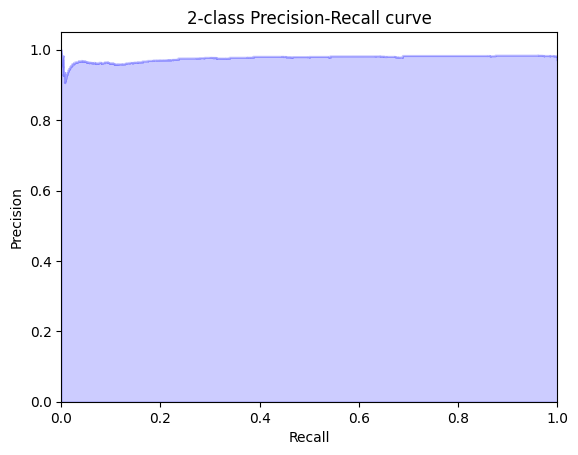

In [15]:
y_test_pred_proba_lr = lr_classifier.predict_proba(x_test)[:,1] # predicted probabilities for being "anomaly"

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba_lr)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')

In [16]:
y_test_pred_proba_lr = lr_classifier.predict_proba(x_test)[:,1] # predicted probabilities for being "anomaly"


In [17]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

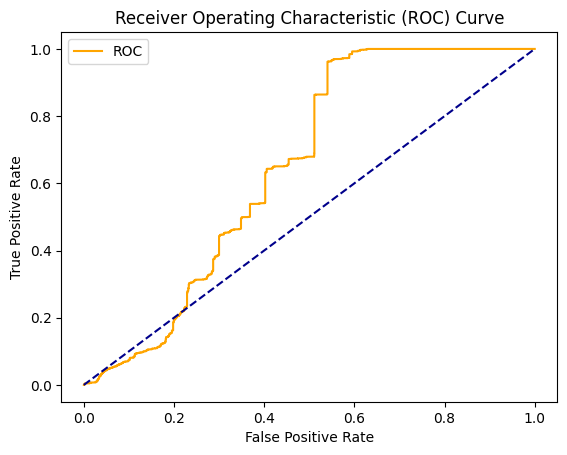

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_lr)
plot_roc_curve(fpr, tpr)

In [19]:
roc_auc = roc_auc_score(y_test, y_test_pred_proba_lr)
print('AUC: %.3f\n' % roc_auc)

AUC: 0.650



Test size: 115013
Positives in test: 111645 Negatives: 3368
ROC AUC: 0.6498799453306197
PR AUC (Average Precision): 0.9762467979733116


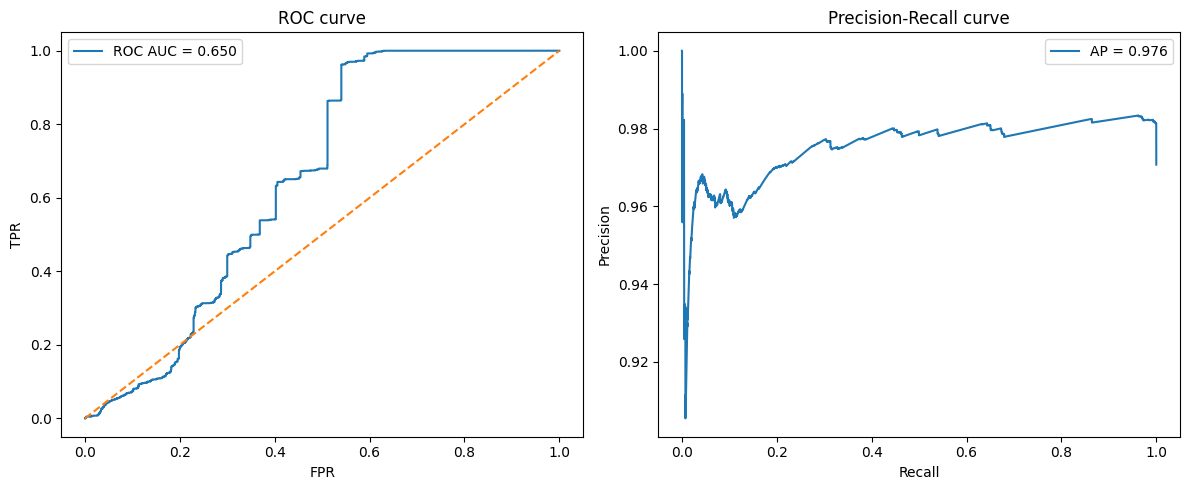

Threshold 0.5 -> precision:0.971, recall:1.000, f1:0.985
Confusion matrix (tn, fp, fn, tp):
 [     0   3368      0 111645]


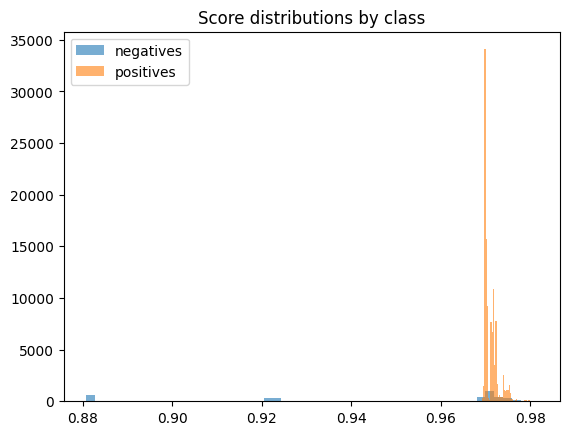

th=0.90: prec=0.976, rec=1.000, f1=0.988
th=0.75: prec=0.971, rec=1.000, f1=0.985
th=0.50: prec=0.971, rec=1.000, f1=0.985
th=0.25: prec=0.971, rec=1.000, f1=0.985
th=0.10: prec=0.971, rec=1.000, f1=0.985


In [25]:
from sklearn.metrics import (
    roc_auc_score, roc_curve, auc,
    precision_recall_curve, average_precision_score,
    precision_recall_fscore_support, confusion_matrix
)
import numpy as np
import matplotlib.pyplot as plt

# 1) ensure you use probabilities / scores
if hasattr(lr_classifier, "predict_proba"):
    scores = lr_classifier.predict_proba(x_test)[:,1]
elif hasattr(lr_classifier, "decision_function"):
    scores = lr_classifier.decision_function(x_test)
else:
    raise ValueError("Estimator has neither predict_proba nor decision_function")

# 2) simple counts
print("Test size:", len(y_test))
print("Positives in test:", np.sum(y_test), "Negatives:", len(y_test) - np.sum(y_test))

# 3) ROC AUC
roc_auc = roc_auc_score(y_test, scores)
fpr, tpr, roc_thresh = roc_curve(y_test, scores)
print("ROC AUC:", roc_auc)

# 4) PR-AUC (average precision)
ap = average_precision_score(y_test, scores)
precision_vals, recall_vals, pr_thresh = precision_recall_curve(y_test, scores)
print("PR AUC (Average Precision):", ap)

# 5) plot ROC and PR curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC curve'); plt.legend()

plt.subplot(1,2,2)
plt.plot(recall_vals, precision_vals, label=f'AP = {ap:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall curve'); plt.legend()
plt.tight_layout()
plt.show()

# 6) confusion matrix and PR/precision/recall at default threshold 0.5
y_pred_05 = (scores >= 0.7).astype(int)
cm = confusion_matrix(y_test, y_pred_05)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred_05, average='binary')
print("Threshold 0.5 -> precision:{:.3f}, recall:{:.3f}, f1:{:.3f}".format(prec, rec, f1))
print("Confusion matrix (tn, fp, fn, tp):\n", cm.ravel())

# 7) inspect score distributions
plt.figure()
plt.hist(scores[y_test==0], bins=50, alpha=0.6, label='negatives')
plt.hist(scores[y_test==1], bins=50, alpha=0.6, label='positives')
plt.legend(); plt.title('Score distributions by class'); plt.show()

# 8) check a few alternative thresholds (optional)
for th in [0.9,0.75,0.5,0.25,0.1]:
    yp = (scores >= th).astype(int)
    p,r,f,_ = precision_recall_fscore_support(y_test, yp, average='binary')
    print(f"th={th:.2f}: prec={p:.3f}, rec={r:.3f}, f1={f:.3f}")
